In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import numpy as np
import time

In [2]:
datasetA = arff.loadarff(open('R15.arff','r'))
# classes des points (supposées non connues)
#print(datasetA[0]['class'])
# abscisses des points
#print(datasetA[0]['x'])
#print([[x,y] for (x,y,c) in datasetA[0]])

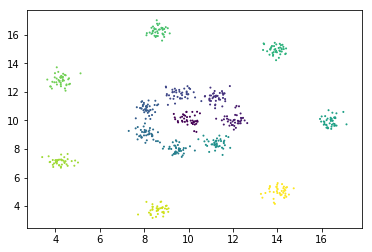

In [3]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = datasetA[0]['class'], s = 1)

In [4]:
datasetB = arff.loadarff(open('cluto-t8-8k.arff','r'))

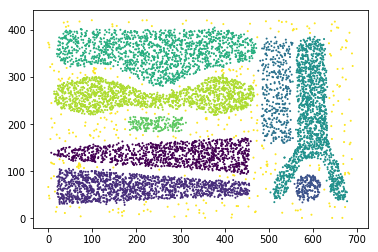

In [5]:
plt.scatter(datasetB[0]['x'],datasetB[0]['y'], c = [int(s) if s.isdigit() else 8 for str in datasetB[0]['CLASS'] for s in str.split()], s = 1)

Kmeans avec le nombre de clusters attendus

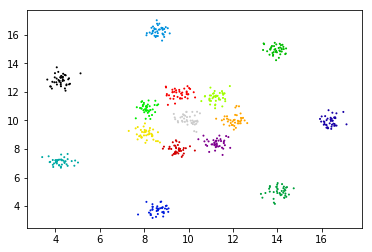

In [6]:
kmeansA = KMeans(n_clusters=15, init='k-means++').fit([[x,y] for (x,y,c) in datasetA[0]])
#print(kmeansA.labels_)
#print(kmeansA.cluster_centers_)
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = kmeansA.labels_, s = 1, cmap = 'nipy_spectral')

Pas de vérité à laquelle se comparer --> possibles évaluations:
    Indice de Davies Bouldin (DB): Combinaison mesures d’homogénéité et de séparation. Valeur faible si les clusters sont homogènes (numérateur petit) et s’ils sont bien séparés (dénominateur grand).
--> Minimiser DB: aide pour déterminer le nombre de clusters
    Silhouette Coefficient: combinaison de mesures de cohésion (proximité) et de séparation.
--> Minimiser S: aide pour déterminer le nombre de clusters
    Calinski-Harabasz Index - Variance Ratio Criterion

In [77]:
### Kmeans iteratif sur dataset
def kmeans_iteratif(dataset, nb_max=50):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    klabels = []

    X = [[x,y] for (x,y,c) in dataset[0]]

    for k in range(2,nb_max):
        start_time = time.time()
        kmeans = KMeans(n_clusters=k, init='k-means++').fit(X)
        elapsed = time.time() - start_time
        labels = kmeans.labels_
        klabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_k_sil = sil_score.index(min(sil_score)) + 2
    best_k_db = db_score.index(min(db_score)) + 2
    best_k_chi = chi_score.index(max(chi_score)) + 2

    plt.plot(range(2,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(2,nb_max),db_score,label = "DB index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(2,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(2,nb_max),duration, label = "Execution time")
    plt.xlabel('k')
    plt.ylabel('time')
    plt.show()
      
    return ((best_k_sil, best_k_db, best_k_chi),klabels)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

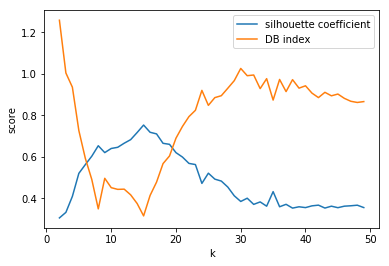

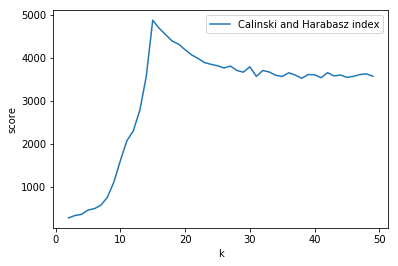

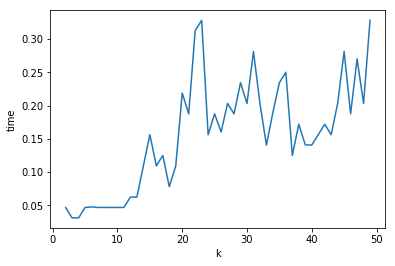

In [78]:
((k_sil,k_db,k_chi),klabels) = kmeans_iteratif(datasetA)

In [67]:
print("best k with silhouette coefficient: ", k_sil)
print("best k with DB index: ", k_db)
print("best k with Calinski and Harabasz index: ", k_chi)

best k with silhouette coefficient:  2
best k with DB index:  15
best k with Calinski and Harabasz index:  15


In [68]:
best_labels_sil = klabels[k_sil-2]
best_labels_db = klabels[k_db-2]
best_labels_chi = klabels[k_chi-2]

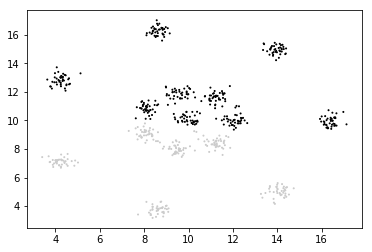

In [69]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')

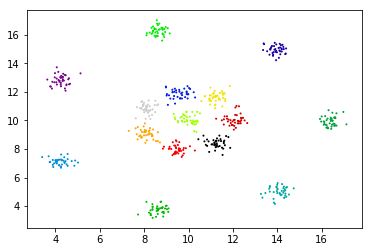

In [70]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')

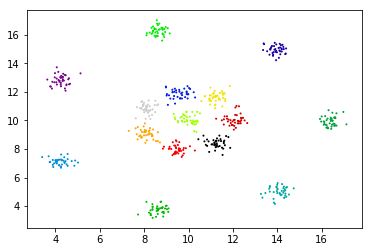

In [71]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

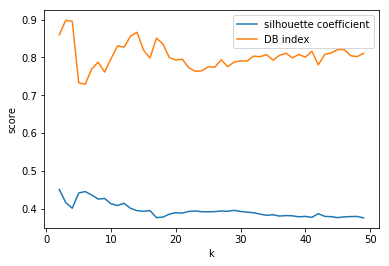

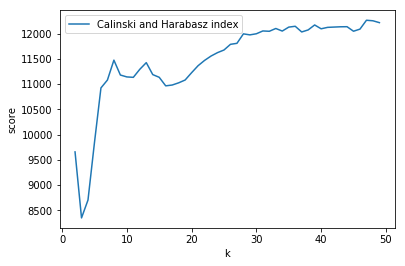

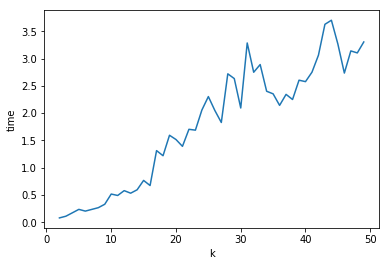

best k with silhouette coefficient:  49
best k with DB index:  6
best k with Calinski and Harabasz index:  47


In [79]:
((k_sil,k_db,k_chi),klabels) = kmeans_iteratif(datasetB)

print("best k with silhouette coefficient: ", k_sil)
print("best k with DB index: ", k_db)
print("best k with Calinski and Harabasz index: ", k_chi)

best_labels_sil = klabels[k_sil-2]
best_labels_db = klabels[k_db-2]
best_labels_chi = klabels[k_chi-2]

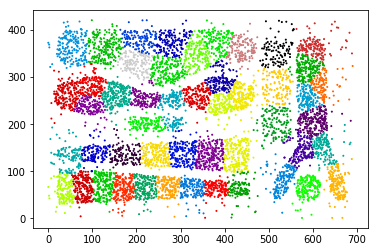

In [81]:
plt.scatter(datasetB[0]['x'],datasetB[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')

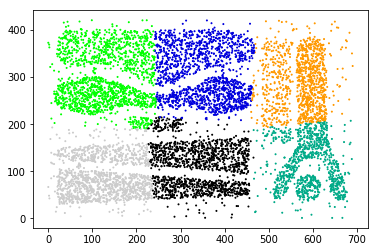

In [82]:
plt.scatter(datasetB[0]['x'],datasetB[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')

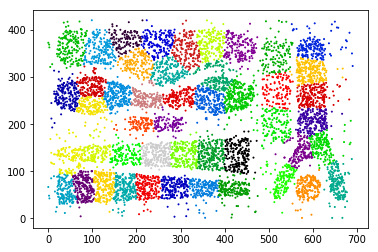

In [83]:
plt.scatter(datasetB[0]['x'],datasetB[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')

In [86]:
##Agglomerative clustering

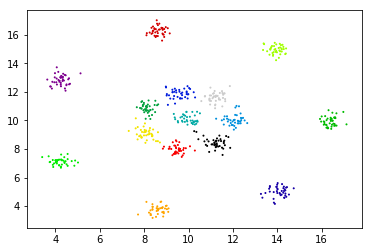

In [97]:
X = [[x,y] for (x,y,c) in datasetA[0]]

#Ward
agglo = AgglomerativeClustering(n_clusters=15, linkage='ward').fit(X)
labels = agglo.labels_
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = labels, s = 1, cmap = 'nipy_spectral')

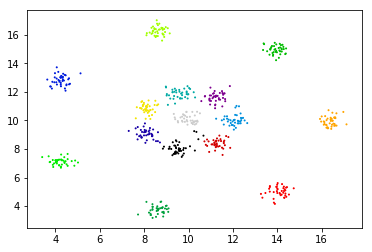

In [98]:
#Complete
agglo = AgglomerativeClustering(n_clusters=15, linkage='complete').fit(X)
labels = agglo.labels_
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = labels, s = 1, cmap = 'nipy_spectral')

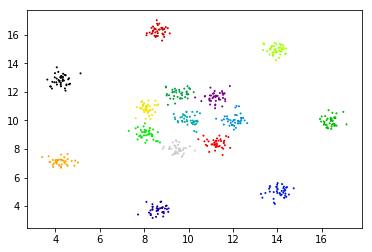

In [99]:
#Average
agglo = AgglomerativeClustering(n_clusters=15, linkage='average').fit(X)
labels = agglo.labels_
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = labels, s = 1, cmap = 'nipy_spectral')

(15,)


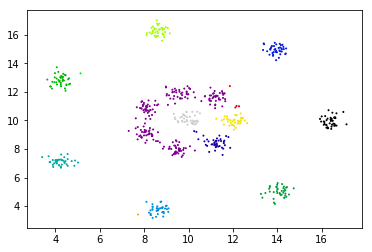

In [104]:
#Single
agglo = AgglomerativeClustering(n_clusters=15, linkage='single').fit(X)
labels = agglo.labels_
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = labels, s = 1, cmap = 'nipy_spectral')
labs = np.array(labels) 
print(np.unique(labs).shape)

In [105]:
### Agglomerative clustering iteratif
def agglo_iteratif(dataset, comb, nb_max=50):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    alabels = []

    X = [[x,y] for (x,y,c) in dataset[0]]

    for k in range(2,nb_max):
        start_time = time.time()
        agglo = AgglomerativeClustering(n_clusters=k, linkage=comb).fit(X)
        elapsed = time.time() - start_time
        labels = agglo.labels_
        alabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_k_sil = sil_score.index(min(sil_score)) + 2
    best_k_db = db_score.index(min(db_score)) + 2
    best_k_chi = chi_score.index(max(chi_score)) + 2

    plt.plot(range(2,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(2,nb_max),db_score,label = "DB index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(2,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(2,nb_max),duration, label = "Execution time")
    plt.xlabel('k')
    plt.ylabel('time')
    plt.show()
      
    return ((best_k_sil, best_k_db, best_k_chi),alabels)

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

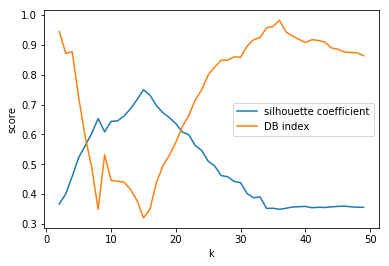

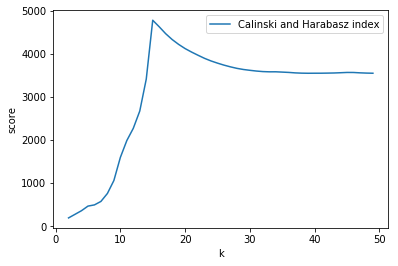

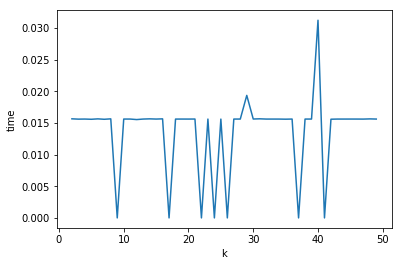

In [106]:
((k_sil,k_db,k_chi),labels) = agglo_iteratif(datasetA,'ward')

In [111]:
print("best k with silhouette coefficient: ", k_sil)
print("best k with DB index: ", k_db)
print("best k with Calinski and Harabasz index: ", k_chi)

best_labels_sil = labels[k_sil-2]
best_labels_db = labels[k_db-2]
best_labels_chi = labels[k_chi-2]

best k with silhouette coefficient:  36
best k with DB index:  15
best k with Calinski and Harabasz index:  15


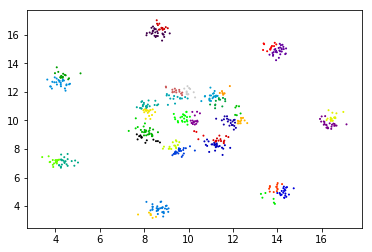

In [112]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')

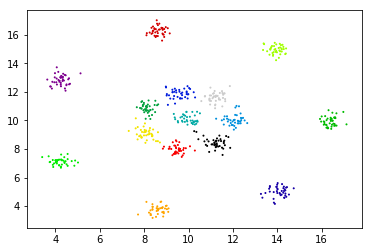

In [113]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')

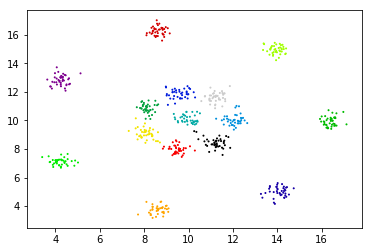

In [114]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

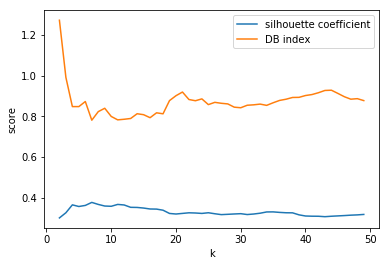

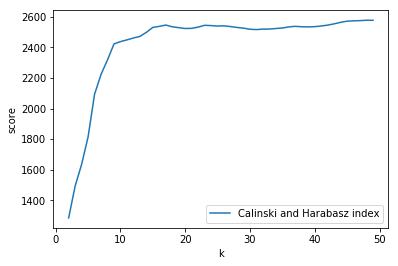

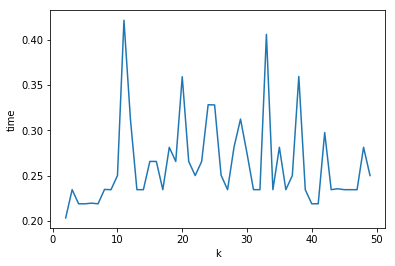

best k with silhouette coefficient:  2
best k with DB index:  7
best k with Calinski and Harabasz index:  48


In [116]:
datasetC = arff.loadarff(open('elly-2d10c13s.arff','r'))

((k_sil,k_db,k_chi),labels) = agglo_iteratif(datasetC,'ward')

print("best k with silhouette coefficient: ", k_sil)
print("best k with DB index: ", k_db)
print("best k with Calinski and Harabasz index: ", k_chi)

best_labels_sil = labels[k_sil-2]
best_labels_db = labels[k_db-2]
best_labels_chi = labels[k_chi-2]

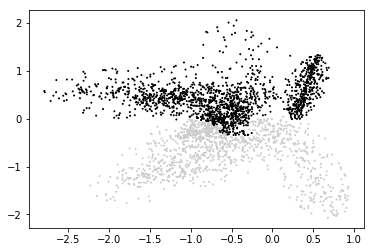

In [117]:
plt.scatter(datasetC[0]['x'],datasetC[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')

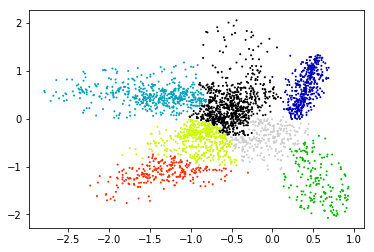

In [118]:
plt.scatter(datasetC[0]['x'],datasetC[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')

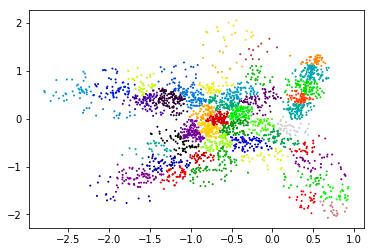

In [119]:
plt.scatter(datasetC[0]['x'],datasetC[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')

In [ ]:
### DBSCAN

In [129]:
X = [[x,y] for (x,y,c) in datasetA[0]]

dbscan = DBSCAN(eps=3, min_samples=5).fit(X)
labels = dbscan.labels_
labs = np.array(labels) 
print(np.unique(labs).shape)

(7,)


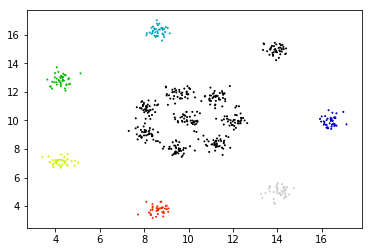

In [130]:
plt.scatter(datasetA[0]['x'],datasetA[0]['y'], c = labels, s = 1, cmap = 'nipy_spectral')

In [11]:
# choisir la variation d'eps selon l'échelle de la figure
### Find eps for DBSCAN
def dbscan_eps(dataset, nb_max, pas, nb_samples):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    dlabels = []

    X = [[x,y] for (x,y,c) in dataset[0]]

    for e in np.arange(0.1,nb_max,pas):
        start_time = time.time()
        dbscan = DBSCAN(eps=e, min_samples=nb_samples).fit(X)
        elapsed = time.time() - start_time
        labels = dbscan.labels_
        dlabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_eps_sil = sil_score.index(min(sil_score))
    best_eps_db = db_score.index(min(db_score))
    best_eps_chi = chi_score.index(max(chi_score))

    plt.plot(range(0,nb_max,pas),sil_score,label = "silhouette coefficient")
    plt.plot(range(0,nb_max,pas),db_score,label = "DB index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(0,nb_max,pas),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(0,nb_max,pas),duration, label = "Execution time")
    plt.xlabel('epsilon')
    plt.ylabel('time')
    plt.show()
      
    return ((best_eps_sil, best_eps_db, best_eps_chi),dlabels)

In [12]:
((e_sil,e_db,e_chi),labels) = dbscan_eps(datasetA,4.0,0.2,5)

e= 0.1
e= 0.30000000000000004
e= 0.5000000000000001
e= 0.7000000000000001
e= 0.9000000000000001
e= 1.1000000000000003
e= 1.3000000000000003
e= 1.5000000000000004
e= 1.7000000000000004


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

e= 1.9000000000000004
e= 2.1000000000000005
e= 2.3000000000000007
e= 2.5000000000000004
e= 2.7000000000000006
e= 2.900000000000001
e= 3.1000000000000005
e= 3.3000000000000007
e= 3.500000000000001


C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\linam\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)